# TMDB Movies Data Analysis

This notebook is the analysis part for the TMDB Movies dataset. There will be some minor cleaning/engineering added on this notebook, but for the most part, the data preparation is done on another notebook.

As usual, before we start, let's import all the libraries necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Questions

On this notebook, I want to focus on __three__ main questions:
1. Is there any specific month/season that would be more beneficial for certain movie genres?
2. What is the most popular release day in this dataset?
3. Who are the best rated movie stars ini this dataset?

Let's take a look at our cleaned dataset

In [2]:
df = pd.read_csv('tmdb_cleaned.csv')
df.head()

,Unnamed: 0,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,release_day,release_month,season
0,0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,5562,6.5,2015,Tuesday,June,Summer
1,1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,6185,7.1,2015,Wednesday,May,Spring
2,2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2480,6.3,2015,Wednesday,March,Spring
3,3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,5292,7.5,2015,Tuesday,December,Winter
4,4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2947,7.3,2015,Wednesday,April,Spring


We can drop the unnamed column.

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Is there any specific month/season that would be more beneficial for certain movie genres?

After taking a look at our dataset, I think we're missing one important feature to answer this question. If we want to know if a month/season is beneficial for certain movie genres, then we would have to know the profit they made. Luckily, we already have the data for revenue and budget, so to calculate the net profit for each movies, we just need to substract the revenue with the budget.

In [4]:
df['profit'] = df['revenue'] - df['budget']

In [6]:
df['profit'] = net_profit

In [5]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,release_day,release_month,season,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,5562,6.5,2015,Tuesday,June,Summer,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,6185,7.1,2015,Wednesday,May,Spring,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2480,6.3,2015,Wednesday,March,Spring,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,5292,7.5,2015,Tuesday,December,Winter,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2947,7.3,2015,Wednesday,April,Spring,1316249360


After we got our profit column, let's take a look at the summary statistic for this dataset.

In [6]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03
mean,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094,1.242409e+08
std,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503,2.183462e+08
min,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,-4.139124e+08
25%,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000,3.142641e+06
50%,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000,4.524300e+07
75%,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000,1.470070e+08
max,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,2.544506e+09


It's interesting to see that we actually have a movie with negative net profit based on the summary above. Let's see what are the movies that took a loss.

In [7]:
df[df['profit'] < 0]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,release_day,release_month,season,profit
44,2.575711,60000000,30418560,Mortdecai,Johnny Depp,David Koepp,106,Comedy,Lionsgate,696,5.3,2015,Wednesday,January,Winter,-29581440
45,2.550747,70000000,17752940,Blackhat,Chris Hemsworth,Michael Mann,133,Mystery,Universal Pictures,584,5.0,2015,Tuesday,January,Winter,-52247060
51,2.345821,100000000,93820758,In the Heart of the Sea,Chris Hemsworth,Ron Howard,122,Thriller,Imagine Entertainment,805,6.4,2015,Friday,November,Fall,-6179242
60,2.026651,11000000,1863315,Tracers,Marie Avgeropoulos,Daniel Benmayor,94,Action,Temple Hill Entertainment,326,5.9,2015,Thursday,January,Winter,-9136685
61,1.980039,4000000,187112,Maggie,Arnold Schwarzenegger,Henry Hobson,95,Horror,Lionsgate,384,5.1,2015,Friday,May,Spring,-3812888
69,1.499614,15000000,14860766,Scouts Guide to the Zombie Apocalypse,Tye Sheridan,Christopher B. Landon,93,Comedy,Paramount Pictures,288,6.2,2015,Friday,October,Fall,-139234
72,1.443406,20000000,208588,Dark Places,Charlize Theron,Gilles Paquet-Brenner,113,Drama,Denver and Delilah Productions,322,5.7,2015,Tuesday,March,Spring,-19791412
84,1.138395,40000000,34227298,Victor Frankenstein,James McAvoy,Paul McGuigan,109,Drama,Twentieth Century Fox Film Corporation,408,5.5,2015,Tuesday,November,Fall,-5772702
85,0.706023,7000000,573335,Freeheld,Julianne Moore,Peter Sollett,103,Romance,Double Feature Films,86,7.1,2015,Friday,October,Fall,-6426665
86,0.689579,15000000,3020664,Rock the Kasbah,Bill Murray,Barry Levinson,100,Comedy,Shangri-La Entertainment,56,5.1,2015,Thursday,October,Fall,-11979336


Wow!! We actually have as many as 265 movies with negative net profit. Another interesting thing I noticed is that movies with negative net profit seems to have low popularity. So let's take a look by plotting the profit column against the popularity column.

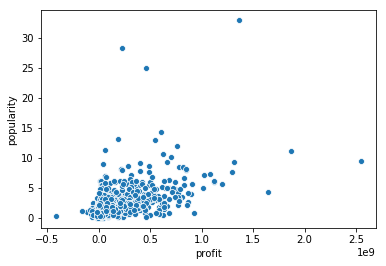

In [10]:
sns.scatterplot(x='profit', y='popularity', data=df)

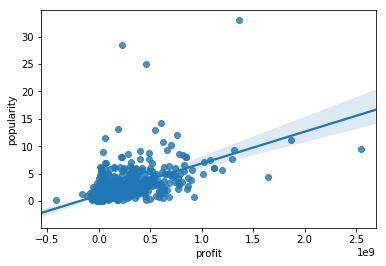

In [11]:
sns.regplot(x='profit', y='popularity', data=df)

As we can see, they're slightly correlated. We'll leave it right now tho because to answer this relationship, we probably would need deeper analysis.

Going back to our first question, we need to know the variation of the movie genres in this dataset.

In [12]:
df['genres'].value_counts()

Drama              274
Action             238
Comedy             230
Adventure          130
Horror              78
Thriller            58
Animation           55
Crime               52
Fantasy             44
Science Fiction     38
Romance             26
Family              19
Documentary         14
Mystery             11
War                  8
History              6
Music                3
Western              3
Name: genres, dtype: int64

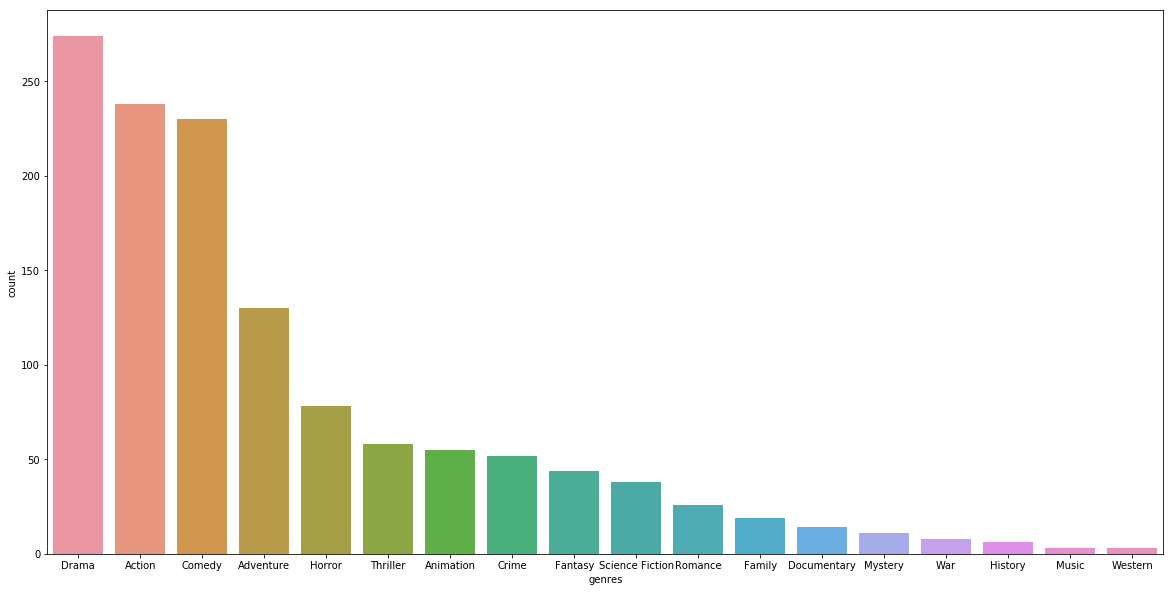

In [27]:
plt.figure(figsize=(20, 10))
sns.countplot(x='genres', data=df, order=df['genres'].value_counts().index)

Drama, Action and Comedy seems to be the leading genres. Let's take a deeper look at this 3 genres by slicing our dataset.

In [51]:
df_maingenres = df.loc[df['genres'].isin(['Drama', 'Action', 'Comedy'])]

Now, we could aggregate our data and group them by month/season and genres then see the average profit.

In [62]:
profit = df.groupby(['season','genres'])['profit'].mean().to_frame()

In [67]:
profit

profit
season genres                       
Fall   Action           1.031624e+08
       Adventure        2.281480e+08
       Animation        2.438827e+08
       Comedy           5.019947e+07
       Crime            3.529657e+07
       Documentary      6.998436e+06
       Drama            6.208382e+07
       Family           1.478723e+08
       Fantasy          1.283650e+08
       History          1.270711e+08
       Horror           6.830835e+07
       Music            1.965694e+07
       Mystery          8.667299e+07
       Romance          7.485848e+07
       Science Fiction  1.917922e+08
       Thriller         1.067944e+07
       War              1.694866e+08
       Western          1.501622e+07
Spring Action           1.850191e+08
       Adventure        3.097502e+08
       Animation        3.090501e+08
       Comedy           8.015203e+07
       Crime            5.060272e+07
       Documentary      3.249155e+07
       Drama            4.006064e+07
       Family           1.624510e+08
       Fantasy          2.845111e+08
       Horror           3.920889e+07
       Mystery          1.553639e+07
       Romance          9.503694e+07
...                              ...
Summer Comedy           7.034035e+07
       Crime            4.042653e+07
       Documentary      2.072696e+07
       Drama            8.054593e+07
       Family           6.243707e+08
       Fantasy          1.593430e+08
       History          7.032320e+07
       Horror           8.148784e+07
       Music           -1.324860e+05
       Mystery         -3.387822e+06
       Romance          1.072508e+08
       Science Fiction  1.996714e+08
       Thriller         9.489941e+07
Winter Action           1.570061e+08
       Adventure        2.436864e+08
       Animation        5.619368e+07
       Comedy           7.399161e+07
       Crime            1.132441e+08
       Documentary      2.797204e+07
       Drama            9.483875e+07
       Family           2.375940e+08
       Fantasy          8.883500e+07
       History          9.400194e+07
       Horror           4.222267e+07
       Mystery          1.674383e+07
       Romance          7.852158e+07
       Science Fiction  2.992415e+07
       Thriller         8.212924e+07
       War              1.338566e+08
       Western          3.979505e+08

[67 rows x 1 columns]

## What is the most popular release day?

Answering this question is relatively easy, we just need to look at the number of movies released during a certain day.

In [70]:
df['release_day'].value_counts()

Friday       429
Thursday     303
Wednesday    258
Tuesday      126
Monday        69
Saturday      51
Sunday        51
Name: release_day, dtype: int64

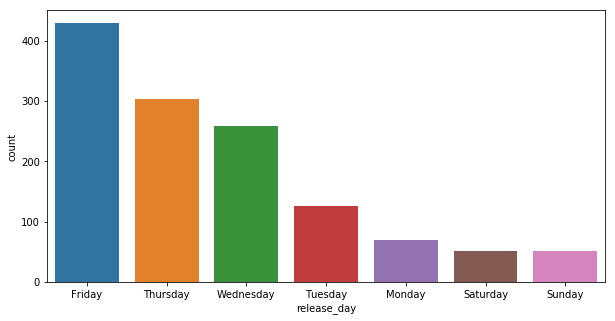

In [73]:
plt.figure(figsize=(10, 5))
sns.countplot(x='release_day', data=df, order=df['release_day'].value_counts().index)

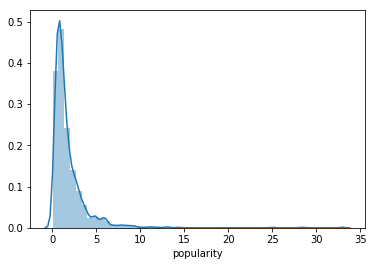

In [83]:
sns.distplot(df['popularity'])

In [ ]:
df.sort_values('revenue', ascending=False).head(10)

In [ ]:
sns.scatterplot(x='revenue', y='popularity', data=df)

In [ ]:
df.sort_values('popularity', ascending=False)

In [ ]:
df.groupby('production_companies')['vote_average'].mean().sort_values(ascending=False).head(10)

In [ ]:
df['release_day'].value_counts()

In [ ]:
df['release_month'].value_counts()

In [ ]:
df_revenue = df.groupby(['release_month', 'genres'])['revenue'].mean()

In [ ]:
df_action = df[df['genres'] == 'Action']

In [ ]:
df_action.groupby('release_month')['revenue'].mean().sort_values(ascending=False)

In [ ]:
df['genres'].value_counts()

In [ ]:
df_cast = df.groupby('lead_cast').filter(lambda x: len(x) > 10)

In [ ]:
df_cast['lead_cast'].value_counts()

In [ ]:
df_cast['lead_cast'].nunique()